In [ ]:
#| hide
import geopandas as gpd
from pyLandUseMX.descargas import *
from pyLandUseMX.coberturas import *

# pyLandUseMX

> Herramientas para construir y obtener variables de uso de suelo en México

El uso de suelo es un insumo básico para diferentes investigaciones en el contexto urbano: criminología, movilidad y diseño urbano, por ejemplo, son campos en los que contar con información sobre el uso real del suelo resulta fundamental para realizar investigaciones cuantitativas. Esta librería busca ofrecer diferentes opciones para construir variables e índices para caracterizar el uso de suelo _real_, es decir el uso observado, en el contexto de las ciudades mexicanas.

Aprovecha diferentes fuentes de datos públicas como el DENUE y el Censo para estimar variables de uso de suelo y su cambio en el tiempo. Provee métodos para definir tipos de uso de suelo y agregarlo en diferentes unidades espaciales: mallas regulares, hexágonos y polígonos arbitrarios (como colonias o AGEBS).

## Instalación

Por lo pronto, la manera más fácil de instalar la librería es usando `pip` para instalar desde el repositorio. Antes es necesario asegurarse de que las dependencias del sistema están instaladas:

* `gdal`
* `rtree`
* `libgeos`
* `proj`

En sistemas basados en `apt`:

```sh
sudo apt-get install -y gdal-bin python3-gdal python3-rtree libspatialindex-dev libgeos-dev libproj-dev
```

Ya con las dependencias instaladas:

```sh
pip install git+https://github.com/CentroGeo/pyLandUseMX
```


## Uso

La librería contiene una serie de módulos para realizar diferentes tareas para la extracción y proceso de variables de uso de suelo. El primer módulo de `descargas`, este símplemente se encarga de asegurar que los datos estén descargados. Por lo pronto todos los datos se descargan a la carpeta `datos/descargas` en el directorio de instalación. Cada función regresa el _path_ al archivo descargado.

Para descargar los datos individualmente:

In [ ]:
pth_redes = descarga_redes()
pth_poli = descarga_poligonos_ciudades()
print(pth_redes, pth_poli)

El archivo ya está descargado
El archivo ya está descargado
/home/plablo/git/pyLandUseMX/datos/descargas/red_zmvm.gpkg /home/plablo/git/pyLandUseMX/datos/descargas/silhuetas.shp.zip


También podemos descargar todos los datos:

## Mallas

El módulo mallas permite agregar diferentes cpas en mallas regulares. Supongamos que tenemos una capa de puntos que representa la ocurrencia de algún uso de suelo y las vialidades primarias. Podemos fácilmente agregar las dos capas en una malla regular, obtener rasters y visualizarlos

In [ ]:
puntos = gpd.read_file("../datos/points_sample.zip") # Leemos los puntos
puntos = puntos.to_crs(32614)
red = gpd.read_file(pth_redes) # Leemos las líneas
red = red.loc[red.tag_id.isin([104,108,106,101])] # Filtramos las vialidades primarias
malla = Malla.desde_capa(puntos, 1000) # Creamos una malla del tamaño de los puntos
malla = (malla
             .agrega_puntos(puntos, campo="puntos")
             .agrega_lineas(red, campo='metros_vialidad')
             )
malla.datos

,grid_id,puntos,geometry,metros_vialidad
0,0,0.0,"POLYGON ((404331.782 2029252.065, 405331.782 2...",0.0
1,1,0.0,"POLYGON ((404331.782 2030252.065, 405331.782 2...",0.0
2,2,0.0,"POLYGON ((404331.782 2031252.065, 405331.782 2...",0.0
3,3,0.0,"POLYGON ((404331.782 2032252.065, 405331.782 2...",0.0
4,4,0.0,"POLYGON ((404331.782 2033252.065, 405331.782 2...",0.0
...,...,...,...,...
50499,50499,0.0,"POLYGON ((639331.782 2238252.065, 640331.782 2...",0.0
50500,50500,1.0,"POLYGON ((639331.782 2239252.065, 640331.782 2...",0.0
50501,50501,0.0,"POLYGON ((639331.782 2240252.065, 640331.782 2...",0.0
50502,50502,0.0,"POLYGON ((639331.782 2241252.065, 640331.782 2...",0.0


Podemos ver los rasters

<matplotlib.collections.QuadMesh>

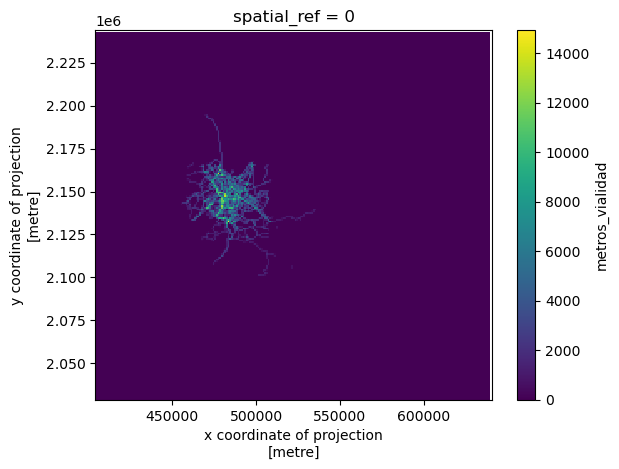

In [ ]:
cube = malla.to_xarray()
cube.metros_vialidad.plot()

## DENUE

Este módulo provee funcionalidades para trabajar con datos del Directorio Nacional de Unidades Económicas y obtener algunas variables de uso de suelo.

Permite seleccionar actividades económicas por clave SCIAN o agregar estas actividades en categorías usando expresiones regulares.
